In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
num_classes = 4
img_rows, img_cols = 224, 224
batch_size = 16

In [3]:
train_data_dir = r'D:\OCT20\train'
validation_data_dir = r'D:\OCT20\test'

In [4]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 8000 images belonging to 4 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 1000 images belonging to 4 classes.


In [8]:
def cnn():
    model = Sequential([
# avem 5 layere
    # 1st CONV-ReLU Layer
    Conv2D(96, (11, 11),strides= 4, activation="relu",padding = 'same', input_shape = (img_rows, img_cols, 3)),
    BatchNormalization(),

    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(3,3), strides= (2,2),padding= 'valid', data_format= None),
    Dropout(0.2),
   
    # 2nd CONV-ReLU Layer
    Conv2D(256, (5, 5),strides= 1, activation="relu", padding = "same"),
    BatchNormalization(),

    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(3,3), strides= (2,2),padding= 'valid', data_format= None),
    Dropout(0.2),

    # 3rd set of CONV-ReLU Layers
    Conv2D(384, (3, 3),strides= 1, activation="relu",padding="same"),
    BatchNormalization(),
    
    # 4rd set of CONV-ReLU Layers
    Conv2D(384, (3, 3),strides= 1, activation="relu",padding="same"),
    BatchNormalization(),
        
    # 5rd set of CONV-ReLU Layers
    Conv2D(256, (3, 3),strides= 1, activation="relu",padding="same"),
    BatchNormalization(),
    
    #Max Pooling with Dropout 
    MaxPooling2D(pool_size=(3,3), strides= (2,2),padding= 'valid', data_format= None),
    Dropout(0.2),
        
    # Global Average Pooling
    #GlobalAveragePooling2D(),
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(1000, activation="relu"),
                 
    # Final Dense Layer
    Dense(num_classes,activation="softmax"),
    ])
    return model

In [9]:
model = cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0

In [10]:
checkpoint = ModelCheckpoint("antrenare_AlexNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

In [12]:
nb_train_samples = 8000
nb_validation_samples = 1000
epochs = 10

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
500/500 [==============================] - 690s 1s/step - loss: 5.2713 - accuracy: 0.2649 - val_loss: 1.2162 - val_accuracy: 0.3952

Epoch 00001: val_loss improved from inf to 1.21618, saving model to antrenare_AlexNet.h5
Epoch 2/10
500/500 [==============================] - 712s 1s/step - loss: 1.3226 - accuracy: 0.3751 - val_loss: 2.0172 - val_accuracy: 0.2641

Epoch 00002: val_loss did not improve from 1.21618
Epoch 3/10
500/500 [==============================] - 795s 2s/step - loss: 1.1428 - accuracy: 0.4526 - val_loss: 1.1035 - val_accuracy: 0.4778

Epoch 00003: val_loss improved from 1.21618 to 1.10352, saving model to antrenare_AlexNet.h5
Epoch 4/10
500/500 [==============================] - 754s 2s/step - loss: 1.0831 - accuracy: 0.4805 - val_loss: 1.9266 - val_accuracy: 0.4698

Epoch 00004: val_loss did not improve from 1.10352
Epoch 5/10
500/500 [==============================] - 877s 2s/step - loss: 0.9636 - accuracy: 0.5723 - val_loss: 0.7297 - val_accuracy: 0.78

In [14]:
scores = model.evaluate(validation_generator,steps=nb_validation_samples // batch_size+1, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

63/63 [==============================] - 14s 217ms/step - loss: 0.7326 - accuracy: 0.7820

Test result: 78.200 loss: 0.733


In [15]:
model.save("antrenare_AlexNet.h5")

In [16]:
#Confusion Matrix

In [17]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 1000 images belonging to 4 classes.


In [18]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [19]:
y_pred = model.predict(validation_generator, nb_validation_samples // batch_size+1)

In [20]:
y_pred_label = np.argmax(y_pred, axis=1)

In [21]:
#Confusion Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred_label))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred_label, target_names=classes))

Confusion Matrix
[[235  12   3   0]
 [  4 192  31  23]
 [ 66  17 114  53]
 [  0   0   9 241]]
Classification Report
              precision    recall  f1-score   support

         CNV       0.77      0.94      0.85       250
         DME       0.87      0.77      0.82       250
      DRUSEN       0.73      0.46      0.56       250
      NORMAL       0.76      0.96      0.85       250

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.77      1000
weighted avg       0.78      0.78      0.77      1000



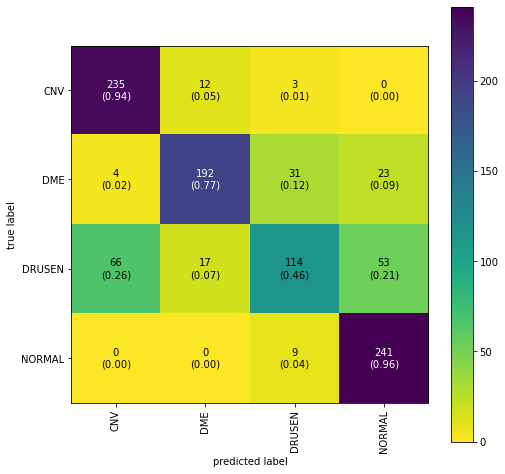

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cnf_matrix=confusion_matrix(validation_generator.classes, y_pred_label)
plot_confusion_matrix(conf_mat=cnf_matrix,figsize=(8,8),show_normed=True)# show norm face si normalizarea
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

color_map = plt.imshow(cnf_matrix)
color_map.set_cmap('viridis_r')
plt.colorbar()

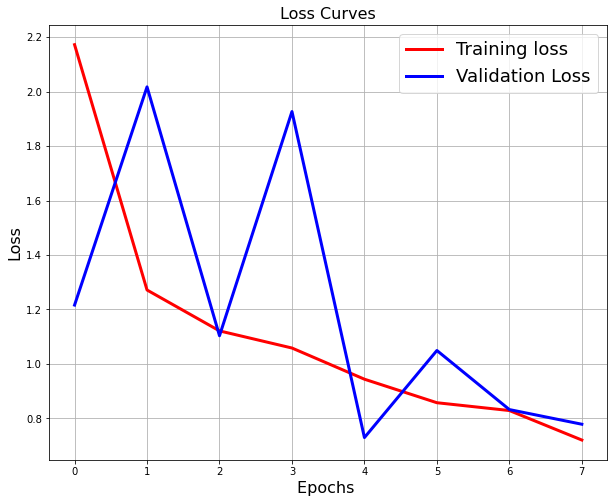

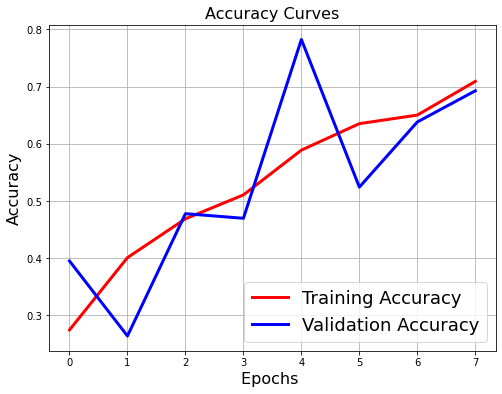

In [23]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
#plt.plot(history.history['acc'],'r',linewidth=3.0)
#plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16);